In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import pycountry

# info

In [68]:
df = pd.read_csv("car_prices.csv")

In [69]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [71]:
df.isnull().mean()*100

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [72]:
df["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime', '4802', '9410', '1167', '2172', '14872', '12655', '15719',
       '6388', '16633', '11034', '2711', '6864', '339', '18384', '9887',
       '9837', '20379', '20627', '721', '6158', '2817', '5705', '18561',
       '2846', '9562', '5001'], dtype=object)

# clean null

In [73]:
df["color"]=df["color"].replace('—', np.nan)

In [74]:
df = df.dropna(subset=["make","model","condition","body","saledate","sellingprice","mmr","interior","color","odometer"])

In [75]:
df["transmission"].mode()[0]

'automatic'

In [76]:
df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0])

C:\Users\mahmo\AppData\Local\Temp\ipykernel_12832\2645026592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transmission"] = df["transmission"].fillna(df["transmission"].mode()[0])


In [77]:
df.isnull().mean()*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
vin             0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [78]:
df.describe(include="O")

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,509277,509277,509277,509277,509277,509277,509277,509277,509277,509277,509277
unique,53,770,1508,85,2,501686,38,19,17,12665,3672
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,81940,17911,52004,185164,493355,5,75130,106599,226776,18130,5092


In [79]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,509277.000000,509277.000000,509277.000000,509277.000000,509277.000000
mean,2010.140784,30.592994,67345.841656,13826.487452,13670.163302
std,3.862755,13.376032,52499.699573,9549.759128,9625.216700
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,23.000000,28368.000000,7350.000000,7100.000000
50%,2012.000000,34.000000,51594.000000,12350.000000,12200.000000
75%,2013.000000,41.000000,97446.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [80]:
df.duplicated().sum()

np.int64(0)

# outliers

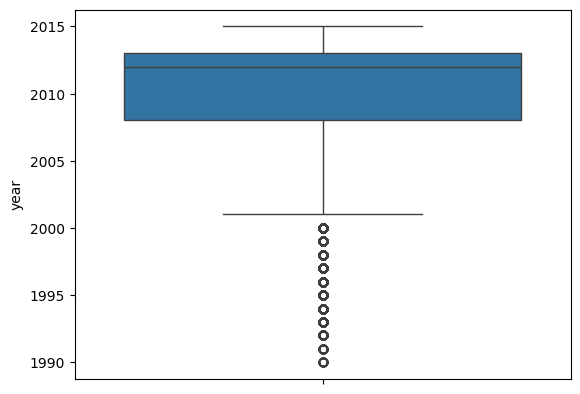

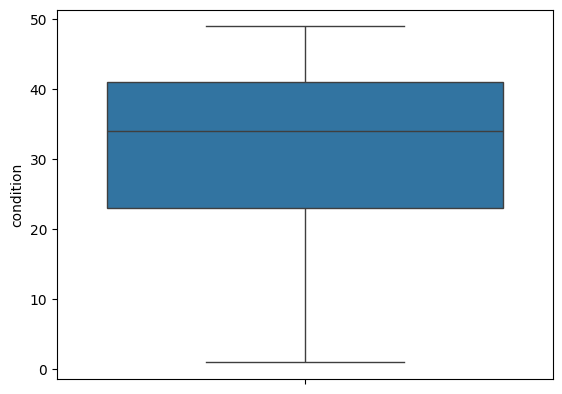

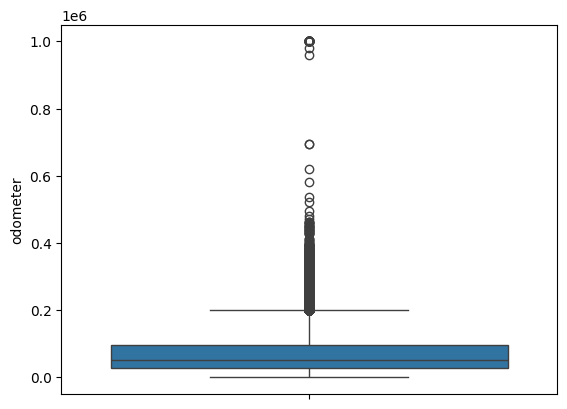

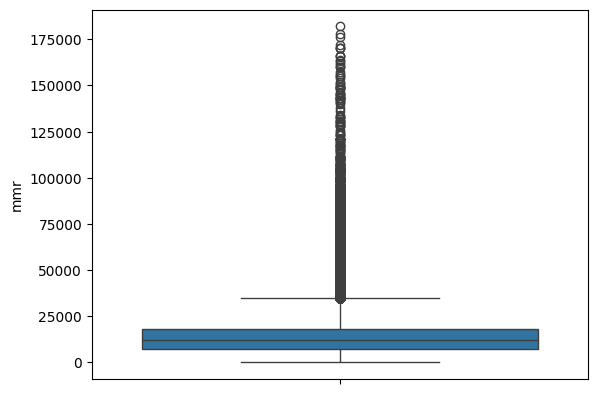

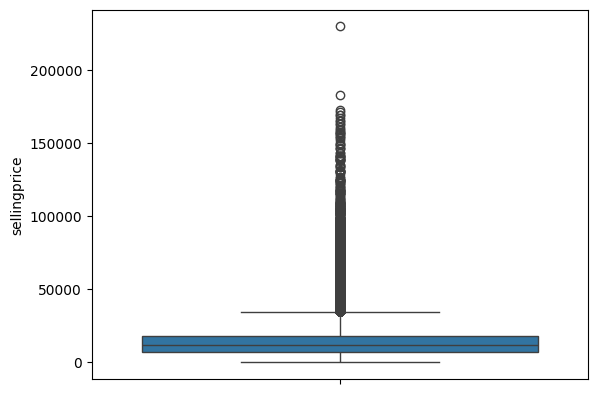

In [81]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.boxplot(df[col])

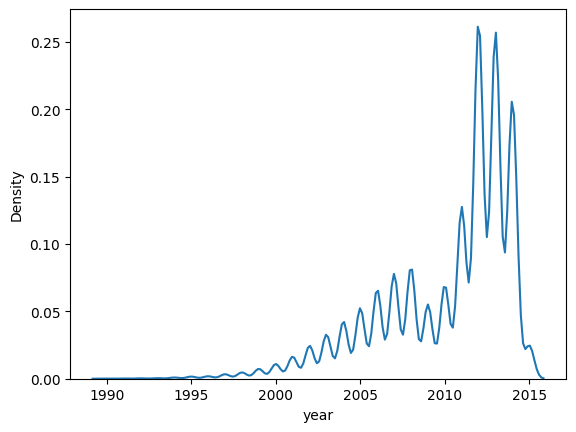

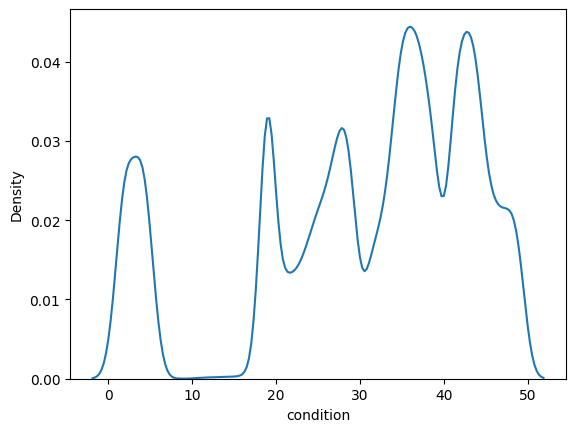

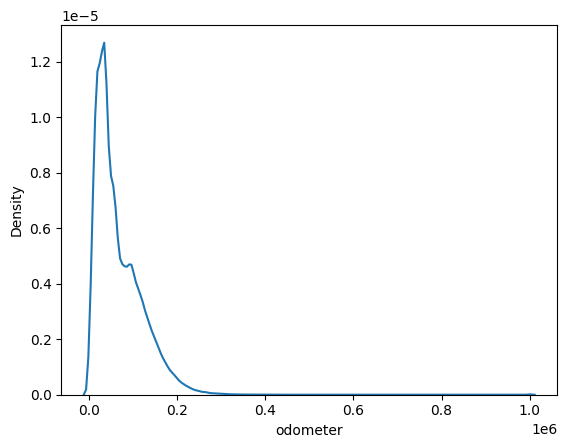

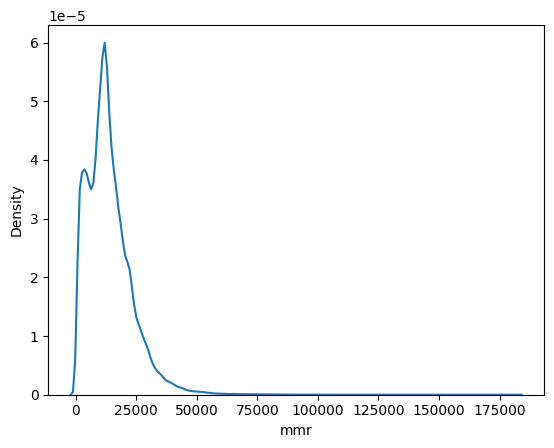

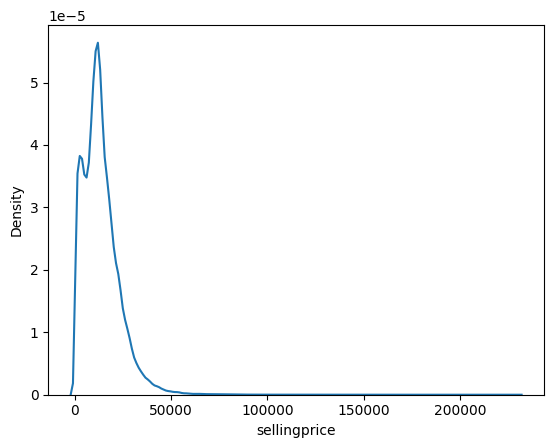

In [82]:
for col in df.select_dtypes('number').columns :
    plt.figure()
    sns.kdeplot(df[col])

In [83]:
df[df["year"] == 1990]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
30242,1990,Toyota,4Runner,SR5 V6,SUV,automatic,jt3vn39w7l0041265,va,1.0,164016.0,blue,blue,flexco fleet services,600.0,500.0,Thu Dec 18 2014 09:20:00 GMT-0800 (PST)
30271,1990,Toyota,Camry,Deluxe,Sedan,automatic,jt2sv21exl0345999,wa,2.0,214723.0,blue,blue,donate for charity,675.0,375.0,Wed Jan 28 2015 04:30:00 GMT-0800 (PST)
30281,1990,Honda,Accord,EX,Sedan,automatic,jhmcb7661lc036504,tx,2.0,19279.0,gray,tan,automotive remarketing inc,875.0,350.0,Tue Dec 23 2014 10:00:00 GMT-0800 (PST)
49555,1990,Lexus,LS 400,Base,Sedan,automatic,jt8uf11e8l0045741,md,2.0,232977.0,off-white,tan,purple heart services inc,450.0,300.0,Tue Dec 23 2014 10:00:00 GMT-0800 (PST)
49556,1990,Toyota,Camry,Deluxe,Sedan,automatic,4t1sv21e0lu227097,ca,2.0,122877.0,blue,—,charitable auto resource,700.0,400.0,Tue Dec 30 2014 13:00:00 GMT-0800 (PST)
49557,1990,Chevrolet,Corvette,Base,Hatchback,automatic,1g1yy2387l5108284,oh,1.0,1.0,red,red,purple heart services inc,7850.0,2800.0,Tue Dec 23 2014 13:00:00 GMT-0800 (PST)
60235,1990,Honda,Accord,LX,Sedan,automatic,jhmcb765xlc131957,nv,1.0,183366.0,gold,—,automotive remarketing inc,775.0,400.0,Thu Jan 22 2015 03:00:00 GMT-0800 (PST)
60240,1990,Mercedes-Benz,300-Class,300E,Sedan,automatic,wdbea30d6lb200847,nv,2.0,141799.0,white,—,automotive remarketing inc,425.0,300.0,Thu Jan 22 2015 03:00:00 GMT-0800 (PST)
60241,1990,Lexus,LS 400,Base,Sedan,automatic,jt8uf11e5l0041243,ca,3.0,106472.0,white,tan,illest motors,550.0,700.0,Wed Dec 31 2014 11:30:00 GMT-0800 (PST)
78403,1990,Honda,Accord,EX,Sedan,automatic,jhmcb7665lc099475,az,1.0,247555.0,gray,gray,cash time title loans,675.0,400.0,Wed Jan 07 2015 11:00:00 GMT-0800 (PST)


In [84]:
df[df["sellingprice"] == 230000]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
344905,2014,Ford,Escape,Titanium,SUV,automatic,1fmcu9j98eua23833,mo,43.0,27802.0,green,tan,ford-lincoln dealer program,22800.0,230000.0,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


In [85]:
def remove_outliers_iqr(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df = remove_outliers_iqr(df,"odometer")

In [86]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,499442.000000,499442.000000,499442.000000,499442.000000,499442.000000
mean,2010.283903,30.833819,63929.827954,14048.713264,13888.466228
std,3.723690,13.296988,45859.932008,9501.825657,9584.447729
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,24.000000,27963.000000,7725.000000,7500.000000
50%,2012.000000,35.000000,50300.000000,12500.000000,12400.000000
75%,2013.000000,42.000000,94422.000000,18450.000000,18400.000000
max,2015.000000,49.000000,201062.000000,182000.000000,230000.000000


# Domain knowlage

In [87]:
def categorize_distance(dist):
    if dist <= 25000 :
        return "<= 25000"
    elif dist <= 50000:
        return "25001-50000"
    elif dist <= 75000:
        return "50001-75000"
    elif dist <= 100000:
        return "75001-100000"
    else:
        return "More than 100000"
df["distance_category"] = df["odometer"].apply(categorize_distance)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,distance_category
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),<= 25000
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),<= 25000
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),<= 25000
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),<= 25000
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),<= 25000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),<= 25000
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),50001-75000
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),50001-75000
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),<= 25000


In [88]:
df["saledate"]

0         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1         Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2         Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3         Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4         Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
                           ...                   
558832    Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834    Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835    Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836    Thu May 28 2015 05:30:00 GMT-0700 (PDT)
Name: saledate, Length: 499442, dtype: object

In [89]:
df["saledate"] =df["saledate"].apply(lambda x : x.split(" GMT")[0] if isinstance(x, str) else x)
df["saledate"]

0         Tue Dec 16 2014 12:30:00
1         Tue Dec 16 2014 12:30:00
2         Thu Jan 15 2015 04:30:00
3         Thu Jan 29 2015 04:30:00
4         Thu Dec 18 2014 12:30:00
                    ...           
558832    Thu Jul 09 2015 07:00:00
558833    Wed Jul 08 2015 09:30:00
558834    Wed Jul 08 2015 09:30:00
558835    Thu Jul 09 2015 06:45:00
558836    Thu May 28 2015 05:30:00
Name: saledate, Length: 499442, dtype: object

In [90]:
df["saledate"] = pd.to_datetime(df["saledate"], errors="coerce")
df["saledate"].isnull().sum()

np.int64(0)

In [91]:
df["saledate"]

0        2014-12-16 12:30:00
1        2014-12-16 12:30:00
2        2015-01-15 04:30:00
3        2015-01-29 04:30:00
4        2014-12-18 12:30:00
                 ...        
558832   2015-07-09 07:00:00
558833   2015-07-08 09:30:00
558834   2015-07-08 09:30:00
558835   2015-07-09 06:45:00
558836   2015-05-28 05:30:00
Name: saledate, Length: 499442, dtype: datetime64[ns]

In [92]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
df["season"] = (df["saledate"].dt.month).apply(get_season)

In [93]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,distance_category,season
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00,<= 25000,Winter
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00,<= 25000,Winter
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00,<= 25000,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,automatic,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,2015-07-09 07:00:00,<= 25000,Summer
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,2015-07-08 09:30:00,50001-75000,Summer
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,2015-07-08 09:30:00,50001-75000,Summer
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,2015-07-09 06:45:00,<= 25000,Summer


In [94]:
def classify_price(df):
    if df["mmr"] > df["sellingprice"]:
        return "higher_than_expected"
    elif df["sellingprice"] > df["mmr"]:
        return "less_than_expected"
    else:
        return "equal"
df["sale_category"] = df.apply(classify_price , axis=1)

# Drop col

In [95]:
df.drop(["vin" ,"trim","seller"],axis=1,inplace=True)

In [96]:
df

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,distance_category,season,sale_category
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,less_than_expected
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,less_than_expected
2,2014,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,2015-01-15 04:30:00,<= 25000,Winter,higher_than_expected
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,2015-01-29 04:30:00,<= 25000,Winter,less_than_expected
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,2014-12-18 12:30:00,<= 25000,Winter,less_than_expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,automatic,in,45.0,18255.0,silver,black,35300.0,33000.0,2015-07-09 07:00:00,<= 25000,Summer,higher_than_expected
558833,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0,2015-07-08 09:30:00,50001-75000,Summer,less_than_expected
558834,2012,BMW,X5,SUV,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0,2015-07-08 09:30:00,50001-75000,Summer,less_than_expected
558835,2015,Nissan,Altima,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0,2015-07-09 06:45:00,<= 25000,Summer,higher_than_expected


In [97]:
df["color"].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [98]:
df

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,distance_category,season,sale_category
0,2015,Kia,Sorento,SUV,automatic,ca,5.0,16639.0,white,black,20500.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,less_than_expected
1,2015,Kia,Sorento,SUV,automatic,ca,5.0,9393.0,white,beige,20800.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,less_than_expected
2,2014,BMW,3 Series,Sedan,automatic,ca,45.0,1331.0,gray,black,31900.0,30000.0,2015-01-15 04:30:00,<= 25000,Winter,higher_than_expected
3,2015,Volvo,S60,Sedan,automatic,ca,41.0,14282.0,white,black,27500.0,27750.0,2015-01-29 04:30:00,<= 25000,Winter,less_than_expected
4,2014,BMW,6 Series Gran Coupe,Sedan,automatic,ca,43.0,2641.0,gray,black,66000.0,67000.0,2014-12-18 12:30:00,<= 25000,Winter,less_than_expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,automatic,in,45.0,18255.0,silver,black,35300.0,33000.0,2015-07-09 07:00:00,<= 25000,Summer,higher_than_expected
558833,2012,Ram,2500,Crew Cab,automatic,wa,5.0,54393.0,white,black,30200.0,30800.0,2015-07-08 09:30:00,50001-75000,Summer,less_than_expected
558834,2012,BMW,X5,SUV,automatic,ca,48.0,50561.0,black,black,29800.0,34000.0,2015-07-08 09:30:00,50001-75000,Summer,less_than_expected
558835,2015,Nissan,Altima,sedan,automatic,ga,38.0,16658.0,white,black,15100.0,11100.0,2015-07-09 06:45:00,<= 25000,Summer,higher_than_expected


In [99]:
df.select_dtypes("O").columns

Index(['make', 'model', 'body', 'transmission', 'state', 'color', 'interior',
       'distance_category', 'season', 'sale_category'],
      dtype='object')

In [100]:
for col in df.select_dtypes("O").columns:
    df[col]=df[col].str.capitalize()

In [101]:
country_names=[]
for code in df["state"]:
    country = pycountry.countries.get(alpha_2=code.upper())
    if country:
        country_names.append(country.name)
    else:
        country_names.append(code)
df["country_name"]=country_names

In [102]:
df

,year,make,model,body,transmission,state,condition,odometer,color,interior,mmr,sellingprice,saledate,distance_category,season,sale_category,country_name
0,2015,Kia,Sorento,Suv,Automatic,Ca,5.0,16639.0,White,Black,20500.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,Less_than_expected,Canada
1,2015,Kia,Sorento,Suv,Automatic,Ca,5.0,9393.0,White,Beige,20800.0,21500.0,2014-12-16 12:30:00,<= 25000,Winter,Less_than_expected,Canada
2,2014,Bmw,3 series,Sedan,Automatic,Ca,45.0,1331.0,Gray,Black,31900.0,30000.0,2015-01-15 04:30:00,<= 25000,Winter,Higher_than_expected,Canada
3,2015,Volvo,S60,Sedan,Automatic,Ca,41.0,14282.0,White,Black,27500.0,27750.0,2015-01-29 04:30:00,<= 25000,Winter,Less_than_expected,Canada
4,2014,Bmw,6 series gran coupe,Sedan,Automatic,Ca,43.0,2641.0,Gray,Black,66000.0,67000.0,2014-12-18 12:30:00,<= 25000,Winter,Less_than_expected,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,Automatic,In,45.0,18255.0,Silver,Black,35300.0,33000.0,2015-07-09 07:00:00,<= 25000,Summer,Higher_than_expected,India
558833,2012,Ram,2500,Crew cab,Automatic,Wa,5.0,54393.0,White,Black,30200.0,30800.0,2015-07-08 09:30:00,50001-75000,Summer,Less_than_expected,Wa
558834,2012,Bmw,X5,Suv,Automatic,Ca,48.0,50561.0,Black,Black,29800.0,34000.0,2015-07-08 09:30:00,50001-75000,Summer,Less_than_expected,Canada
558835,2015,Nissan,Altima,Sedan,Automatic,Ga,38.0,16658.0,White,Black,15100.0,11100.0,2015-07-09 06:45:00,<= 25000,Summer,Higher_than_expected,Gabon


In [103]:
df.to_csv("car_prices_cleaned.csv")